In [1]:
# Basic imports for Numpy and pandas
import numpy as np
import pandas as pd

In [29]:
# Dataset import using CSV File 

chicagoCrimeData = pd.read_csv("../Data/chicagoCrime.csv", error_bad_lines=False, encoding='unicode_escape', low_memory=False)

In [30]:
# Check Data Entries by using head value

print(chicagoCrimeData.head())

         ID Case Number                    Date                 Block  IUCR  \
0  11034701    JA366925  01/01/2001 11:00:00 AM       016XX E 86TH PL  1153   
1  11227287    JB147188  10/08/2017 03:00:00 AM    092XX S RACINE AVE  0281   
2  11227583    JB147595  03/28/2017 02:00:00 PM       026XX W 79TH ST  0620   
3  11227293    JB147230  09/09/2017 08:17:00 PM  060XX S EBERHART AVE  0810   
4  11227634    JB147599  08/26/2017 10:00:00 AM   001XX W RANDOLPH ST  0281   

          Primary Type                          Description  \
0   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2             BURGLARY                       UNLAWFUL ENTRY   
3                THEFT                            OVER $500   
4  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   8.0            45

In [31]:
# Checking shape of the data

chicagoCrimeData.shape

(7171923, 22)

In [32]:
# Check the Missing values

chicagoCrimeData.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      7110
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613484
FBI Code                     0
X Coordinate             69243
Y Coordinate             69243
Year                         0
Updated On                   0
Latitude                 69243
Longitude                69243
Location                 69243
dtype: int64

In [33]:
# Dropping the missing values as they contribute less than 10% of overall data

chicagoCrimeData = chicagoCrimeData.dropna(axis=0)

In [34]:
# Dataset infomation to check the type of features

chicagoCrimeData.info()
chicagoCrimeData.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491263 entries, 60283 to 7171922
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.0+ GB


(6491263, 22)

In [36]:
# importing the Datetime class for date conversion
from datetime import datetime

# Changing "DATE" column with the date format
chicagoCrimeData["Date"] = pd.to_datetime(chicagoCrimeData['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [37]:
# DateTime feature extraction

chicagoCrimeData["Day"] = chicagoCrimeData["Date"].dt.day
chicagoCrimeData["Month"] = chicagoCrimeData["Date"].dt.month
chicagoCrimeData["Year"] = chicagoCrimeData["Date"].dt.year
chicagoCrimeData["Hour"] = chicagoCrimeData["Date"].dt.hour
chicagoCrimeData["Minute"] = chicagoCrimeData["Date"].dt.minute
chicagoCrimeData["Day of Week"] = chicagoCrimeData["Date"].dt.dayofweek

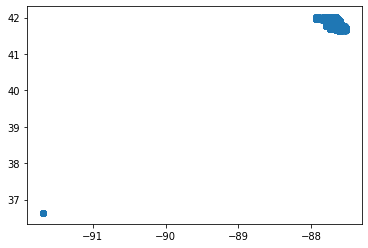

In [38]:
# Checking for Location outliers


import matplotlib.pyplot as plt

plt.scatter(x= chicagoCrimeData["Longitude"], y = chicagoCrimeData["Latitude"])

plt.show();

In [39]:
# Removing location outliers from the data 
    
chicagoCrimeData =  chicagoCrimeData.loc[(chicagoCrimeData['X Coordinate'] != 0) & (chicagoCrimeData['Y Coordinate'] != 0)]
chicagoCrimeData.shape

(6491154, 27)

In [40]:
# Check the categorical features

chicagoCrimeData.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
Arrest,6491154,2,False,4732195,NaN,NaN
Domestic,6491154,2,False,5613158,NaN,NaN
FBI Code,6491154,26,06,1375880,NaN,NaN
Primary Type,6491154,35,THEFT,1375880,NaN,NaN
Location Description,6491154,214,STREET,1663419,NaN,NaN
IUCR,6491154,400,0486,555172,NaN,NaN
Description,6491154,526,SIMPLE,715278,NaN,NaN
Updated On,6491154,2682,02/10/2018 03:50:01 PM,2759253,NaN,NaN
Block,6491154,36000,100XX W OHARE ST,13096,NaN,NaN
Location,6491154,654595,"(41.976290414, -87.905227221)",13083,NaN,NaN


In [41]:
# Converting categorical features of True or False into 0 and 1.

chicagoCrimeData = chicagoCrimeData.replace({False: 0, True: 1})

In [42]:
# Drop unnecessary columns

chicagoCrimeData = chicagoCrimeData.drop(['Updated On', 'Case Number', 'Location Description', 'Location'],axis=1)

In [43]:
# Extracting entries for the last decade i.e. from 2010 to 2020

chicagoCrimeData = chicagoCrimeData.loc[ chicagoCrimeData['Year'] > 2009 ]

In [44]:
# Removing the half entries of 2020 
# Preserving these entries of 2020 into new dataframe for further use

chicagoCrimeData2020 = chicagoCrimeData.loc[ chicagoCrimeData['Year'] > 2019]

chicagoCrimeData = chicagoCrimeData.loc[ chicagoCrimeData['Year'] < 2020 ]

In [45]:
chicagoCrimeData2020.shape

(122360, 23)

In [46]:
# Store the pre-processed data into CSV for further process

chicagoCrimeData.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeData.csv')
chicagoCrimeData2020.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeData2020.csv')